In [1]:
# copy the lib file in the working directory and load it
from shutil import copyfile
copyfile('target/release/libising_triangular.so', 'ising_triangular.so')
import ising_triangular as it

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import threading
import time

In [3]:
n = 24
a = 128
xs = [(-1)**i * np.ones((a, a), dtype=np.int32) for i in range(n)]
es = [-3 * a * a] * n
ts = np.linspace(0.1, 5, n)

<IPython.core.display.Javascript object>


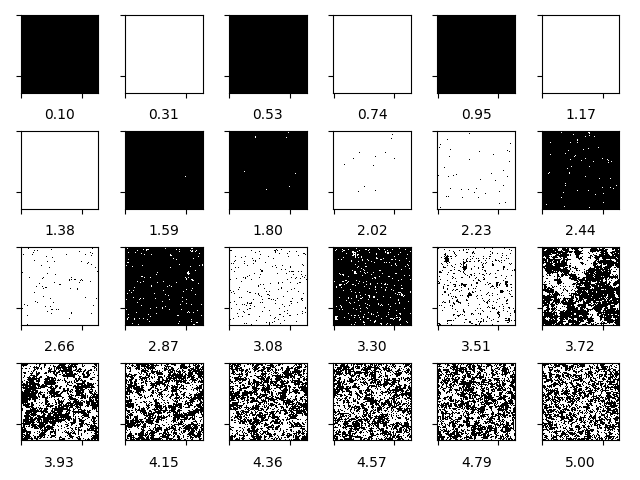

In [4]:
sq = np.floor(np.sqrt(n / 1.5))
fig, axs = plt.subplots(int(sq), int(np.ceil(n / sq)))
axes = axs.flatten()

def plot(i):
    axes[i].set_xlabel("{:.2f}".format(ts[i]))
    axes[i].set_xticklabels([], [])
    axes[i].set_yticklabels([], [])
    return axes[i].imshow(xs[i], cmap='gray', vmin=-1, vmax=1)

imgs = [plot(i) for i in range(n)]

fig.tight_layout()

def replot(xs):
    for i in range(n):
        imgs[i].set_data(xs[i])
    fig.canvas.draw()

In [5]:
def top(text=None):
    now = time.time()
    if text:
        print("{} : {:.2f}s".format(text, now - top.past))
    top.past = now
    
top.past = time.time()

In [6]:
def sweep(k):
    def foo():
        es[k] += it.sweep(xs[k], ts[k])
    return foo

for _ in range(100):
    # create threads
    top()

    for _ in range(10):
        # start all the threads
        threads = [threading.Thread(target=sweep(i)) for i in range(n)]
        for t in threads:
            t.start()
        #top('starting all the threads')

        # wait threads to finish
        for t in threads:
            t.join()
        #top('sweeps')

        # performs swaps
        for _ in range(2 * n):
            [i, j] = np.random.choice(n, 2, replace=False)
            if np.random.uniform() < np.exp((es[i] - es[j]) * (1 / ts[i] - 1 / ts[j])):
                ts[i], ts[j] = ts[j], ts[i]
    top('seep + swaps')
    
    # reorder from low to high temperature
    order = np.argsort(ts)
    ts = [ts[i] for i in order]
    xs = [xs[i] for i in order]
    es = [es[i] for i in order]
    
    replot(xs)
    top('plot')


 : 0.06s
seep + swaps : 0.56s
reorder : 0.00s
plot : 0.70s
 : 0.00s
seep + swaps : 0.30s
reorder : 0.00s
plot : 0.52s
 : 0.00s
seep + swaps : 0.52s
reorder : 0.00s
plot : 0.37s
 : 0.00s
seep + swaps : 0.25s
reorder : 0.00s
plot : 0.20s
 : 0.00s
seep + swaps : 0.25s
reorder : 0.00s
plot : 0.27s
 : 0.00s
seep + swaps : 0.39s
reorder : 0.00s
plot : 0.19s
 : 0.00s
seep + swaps : 0.27s
reorder : 0.00s
plot : 0.19s
 : 0.00s
seep + swaps : 0.26s
reorder : 0.00s
plot : 0.19s
 : 0.00s
seep + swaps : 0.27s
reorder : 0.00s
plot : 0.21s
 : 0.00s
seep + swaps : 0.29s
reorder : 0.00s
plot : 0.19s
 : 0.00s
seep + swaps : 0.26s
reorder : 0.00s
plot : 0.20s
 : 0.00s
seep + swaps : 0.26s
reorder : 0.00s
plot : 0.19s
 : 0.00s
seep + swaps : 0.27s
reorder : 0.00s
plot : 0.19s
 : 0.00s
seep + swaps : 0.26s
reorder : 0.00s
plot : 0.20s
 : 0.00s
seep + swaps : 0.27s
reorder : 0.00s
plot : 0.19s
 : 0.00s
seep + swaps : 0.27s
reorder : 0.00s
plot : 0.19s
 : 0.00s
seep + swaps : 0.27s
reorder : 0.00s
plot : 0.2